In [1]:
# Importamos librerías
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
# Datos de ejemplo: [velocidad, manejo]
X = np.array([[10, 95],  # Boo: Ligero
              [20, 90],  # Toad: Ligero
              [30, 70],  # BabyLuigi: Ligero
              [50, 90],  # Coopa Tropa: Ligero
              [50, 50],  # Mario: Medio
              [65, 70],  # Peach: Medio
              [70, 50],  # Yoshi: Medio
              [80, 30],  # Huesitos: Medio
              [100, 10], # Bowser: Pesado
              [85, 40],  # Waluigi: Pesado
              [95, 20]]) # Donkey Kong: Pesado

# Etiquetas de las categorías: 0 para Ligero, 1 para Medio, 2 para Pesado
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2])

In [3]:
# Crear el modelo k-NN con k=5
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [4]:
# Bowser Jr: Nuevo personaje con velocidad 40 y menejo 60
personaje_nuevo = np.array([[40, 60]])

# Predecir la categoría de BowserJr
prediccion = knn.predict(personaje_nuevo)

# Obtener las distancias y los índices de los k vecinos más cercanos al personaje nuevo
distancias, indices = knn.kneighbors(personaje_nuevo)

In [5]:
# Imprimimos la clase ganadora
if prediccion[0] == 0:
    print("El personaje es ligero")
elif prediccion[0] == 1:
    print("El personaje es medio")
else:
    print("El personaje es pesado")

El personaje es medio


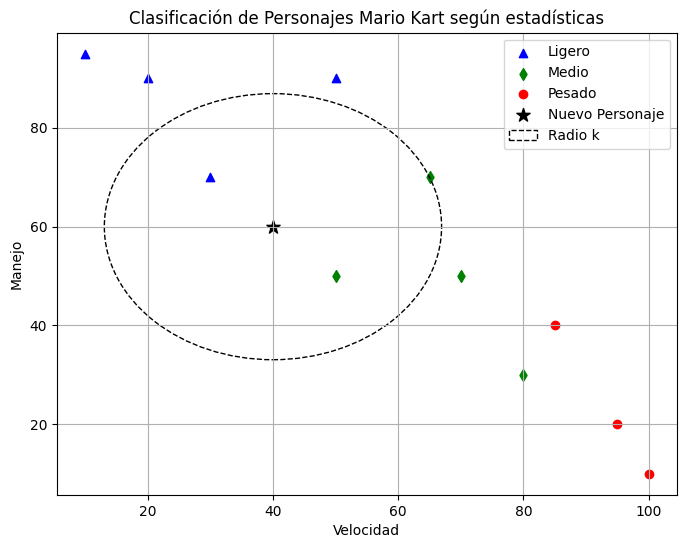

In [6]:
# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar los datos de entrenamiento
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Ligero', marker='^')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Medio', marker='d')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='red', label='Pesado', marker='o')

# Graficar al nuevo personaje con su categoría predicha
plt.scatter(personaje_nuevo[:, 0], personaje_nuevo[:, 1], color="black", label='Nuevo Personaje', s=100, marker='*')

# Dibujar el círculo de los k vecinos más cercanos
radio = np.max(distancias)  # El radio del círculo es la distancia al vecino más lejano
circulo = Circle(personaje_nuevo[0], radio, color='black', fill=False, linestyle='--', label='Radio k')
plt.gca().add_patch(circulo)

plt.xlabel('Velocidad')
plt.ylabel('Manejo')
plt.title('Clasificación de Personajes Mario Kart según estadísticas')
plt.legend()
plt.grid(True)
plt.show()